<ipython-input-1-221aa2885214>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')


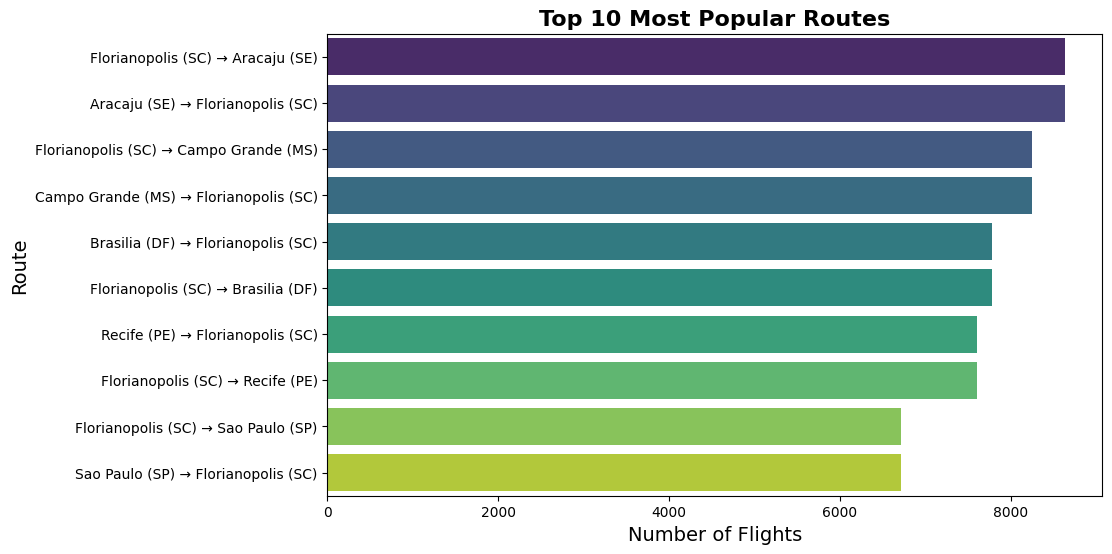

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('flights.csv')

# Combine 'from' and 'to' columns to form the route
df['Route'] = df['from'] + ' → ' + df['to']

# Count top 10 routes
top_routes = df['Route'].value_counts().head(10)

# Plot the top 10 routes
plt.figure(figsize=(10, 6))
sns.barplot(x=top_routes.values, y=top_routes.index, palette='viridis')
plt.title('Top 10 Most Popular Routes', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.show()

<ipython-input-2-5af77014e21b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_type_count.index, y=flight_type_count.values, palette='coolwarm')


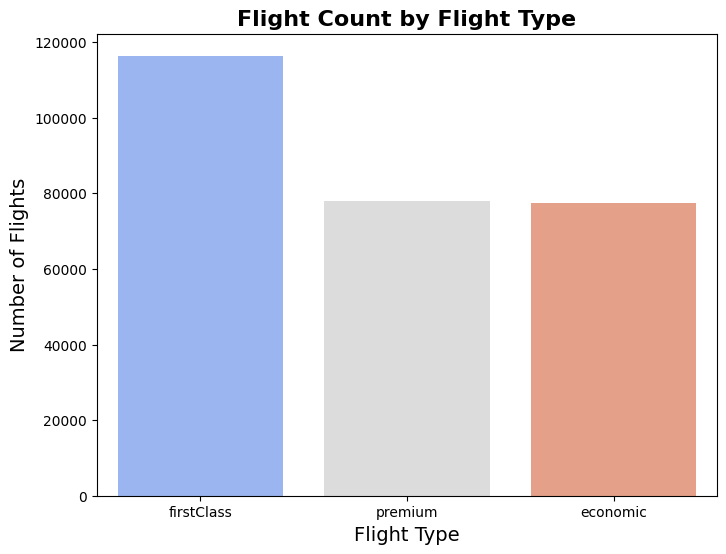

In [ ]:
# Count flight types
flight_type_count = df['flightType'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=flight_type_count.index, y=flight_type_count.values, palette='coolwarm')
plt.title('Flight Count by Flight Type', fontsize=16, fontweight='bold')
plt.xlabel('Flight Type', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

<ipython-input-3-adb0458f1444>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_agencies.values, y=top_agencies.index, palette='Blues_r')


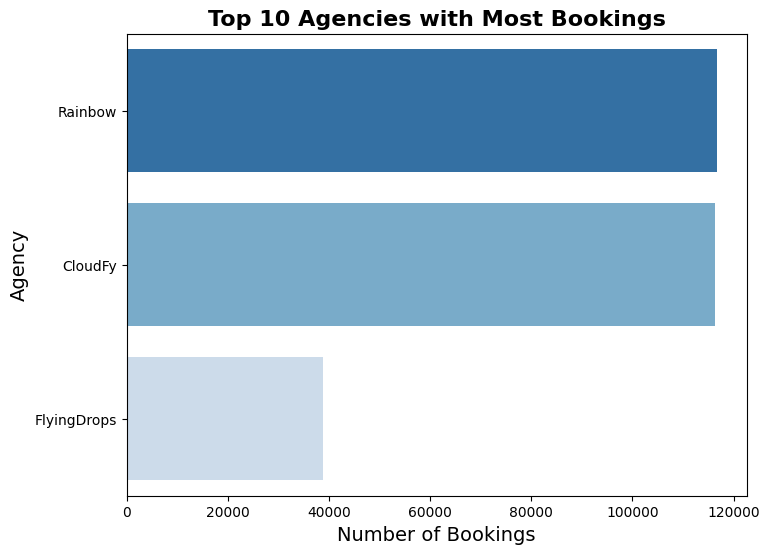

In [ ]:
# Count bookings by agency
top_agencies = df['agency'].value_counts().head(10)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=top_agencies.values, y=top_agencies.index, palette='Blues_r')
plt.title('Top 10 Agencies with Most Bookings', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bookings', fontsize=14)
plt.ylabel('Agency', fontsize=14)
plt.show()

<ipython-input-4-b9333bdf91e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_route.values, y=avg_price_route.index, palette='magma')


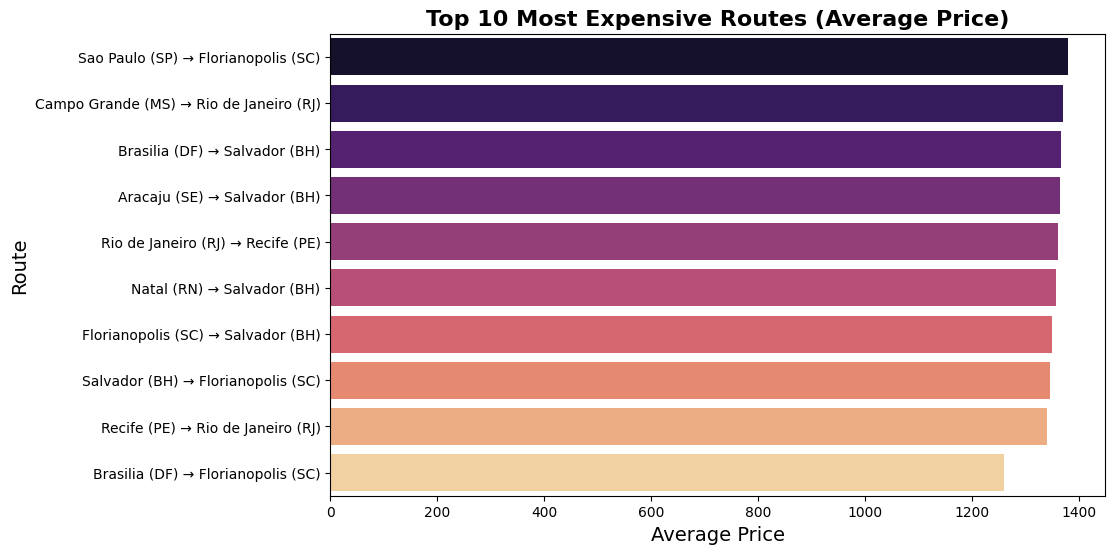

In [ ]:
# Calculate average flight price per route
avg_price_route = df.groupby('Route')['price'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_route.values, y=avg_price_route.index, palette='magma')
plt.title('Top 10 Most Expensive Routes (Average Price)', fontsize=16, fontweight='bold')
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Route', fontsize=14)
plt.show()

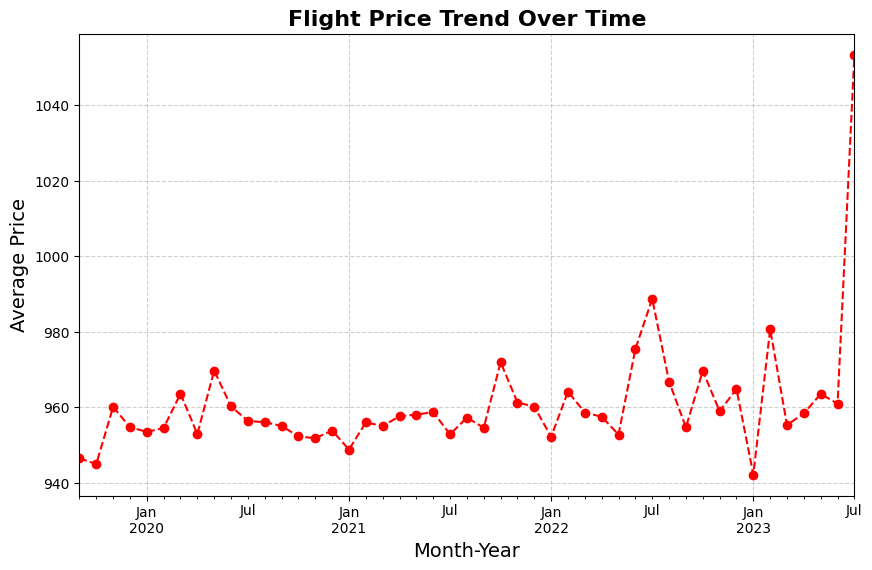

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by month and year to get average price
price_trend = df.groupby(df['date'].dt.to_period('M'))['price'].mean()

# Plot
plt.figure(figsize=(10, 6))
price_trend.plot(kind='line', color='red', marker='o', linestyle='--')
plt.title('Flight Price Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-6-258200d48b1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users.values, y=top_users.index, palette='Purples')


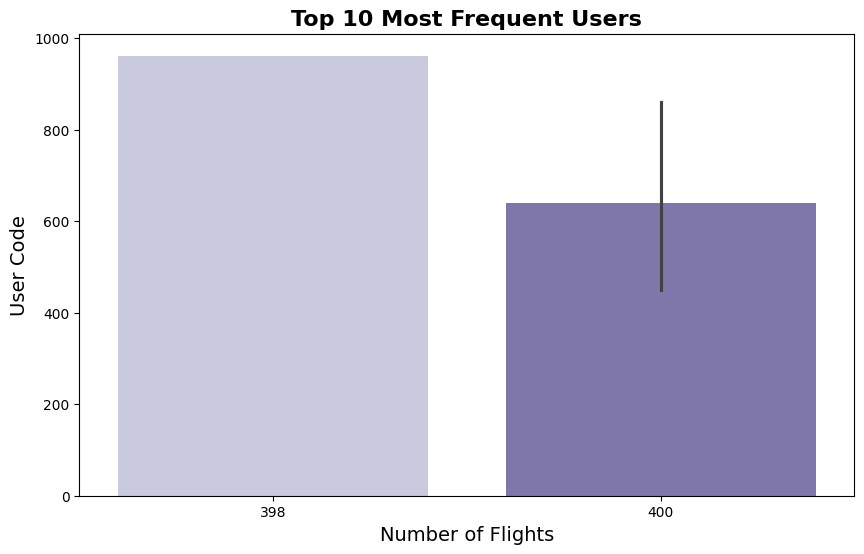

In [ ]:
# Count number of flights per user
top_users = df['userCode'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users.values, y=top_users.index, palette='Purples')
plt.title('Top 10 Most Frequent Users', fontsize=16, fontweight='bold')
plt.xlabel('Number of Flights', fontsize=14)
plt.ylabel('User Code', fontsize=14)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target variable
X = df[['distance', 'time']]  # Independent variables
y = df['price']               # Dependent variable (price)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 77238.53


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode 'flightType' column (Economy = 0, First Class = 1)
df['flightType'] = df['flightType'].apply(lambda x: 1 if x == 'firstClass' else 0)

# Features and target variable
X = df[['distance', 'time', 'price']]  # Independent variables
y = df['flightType']                   # Dependent variable (flight class)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


<ipython-input-10-b4af6dd36fed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hotel_counts.head(10).values, y=hotel_counts.head(10).index, palette='viridis')


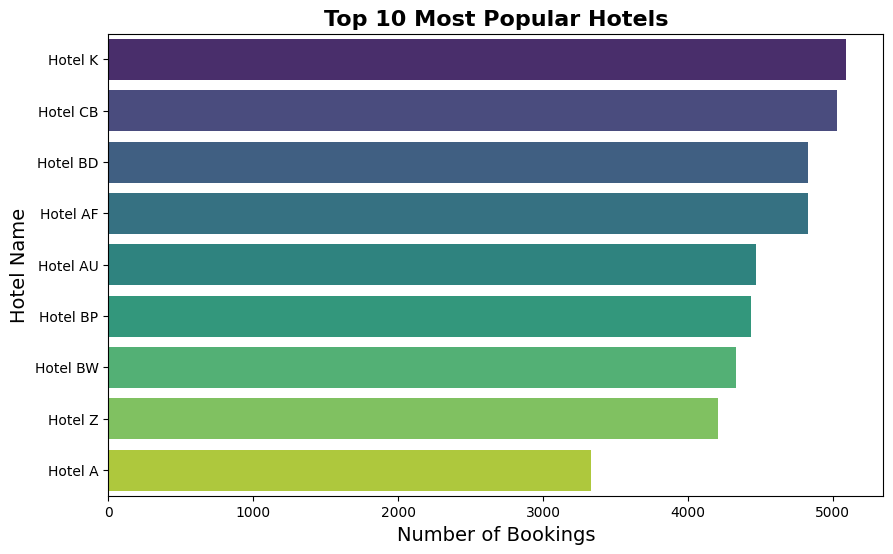

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('hotels.csv')

# Count the number of bookings per hotel
hotel_counts = df['name'].value_counts()

# Plot the top 10 most popular hotels
plt.figure(figsize=(10, 6))
sns.barplot(x=hotel_counts.head(10).values, y=hotel_counts.head(10).index, palette='viridis')
plt.title('Top 10 Most Popular Hotels', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bookings', fontsize=14)
plt.ylabel('Hotel Name', fontsize=14)
plt.show()

<ipython-input-11-83fb6fba510f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_stay_duration.values, y=avg_stay_duration.index, palette='magma')


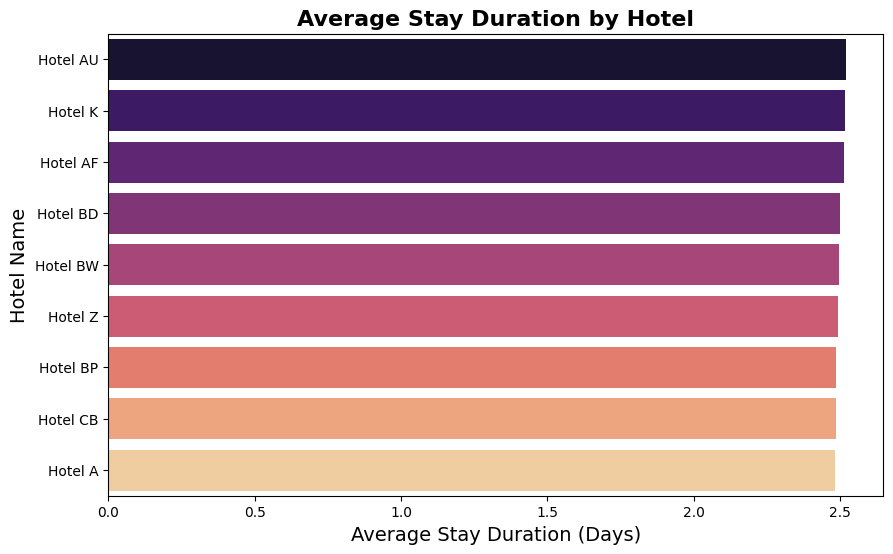

In [ ]:
# Calculate average stay duration by hotel
avg_stay_duration = df.groupby('name')['days'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_stay_duration.values, y=avg_stay_duration.index, palette='magma')
plt.title('Average Stay Duration by Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Average Stay Duration (Days)', fontsize=14)
plt.ylabel('Hotel Name', fontsize=14)
plt.show()

<ipython-input-12-fd96b6c3431f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=place_counts.head(10).values, y=place_counts.head(10).index, palette='Blues_r')


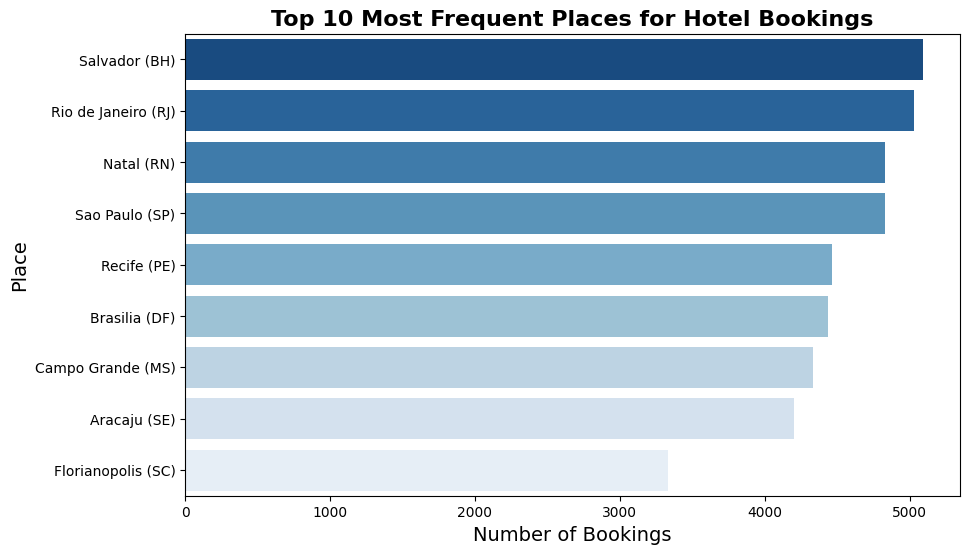

In [ ]:
# Count bookings by place
place_counts = df['place'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=place_counts.head(10).values, y=place_counts.head(10).index, palette='Blues_r')
plt.title('Top 10 Most Frequent Places for Hotel Bookings', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bookings', fontsize=14)
plt.ylabel('Place', fontsize=14)
plt.show()

<ipython-input-13-80d9f8d451ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_place.values, y=avg_price_place.index, palette='coolwarm')


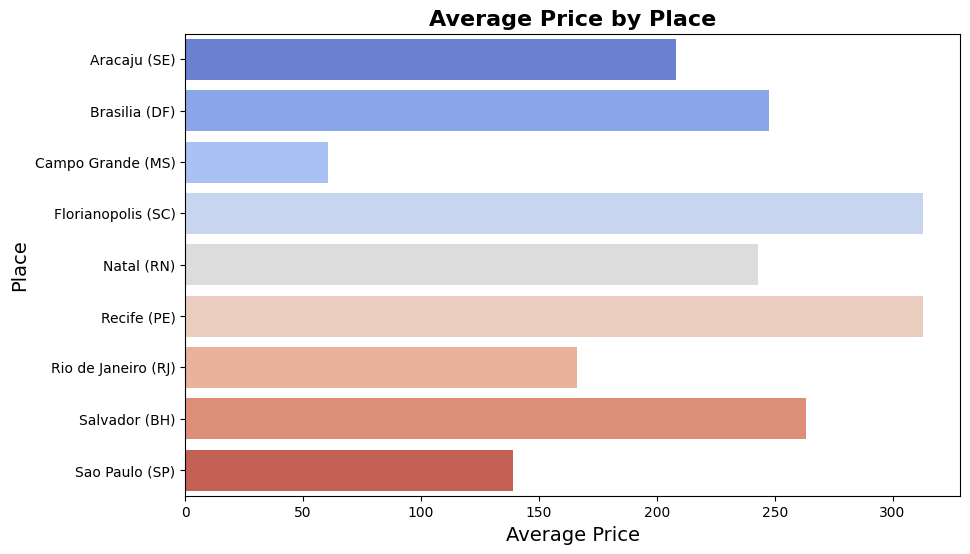

In [ ]:
# Calculate average price by place
avg_price_place = df.groupby('place')['price'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_place.values, y=avg_price_place.index, palette='coolwarm')
plt.title('Average Price by Place', fontsize=16, fontweight='bold')
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Place', fontsize=14)
plt.show()

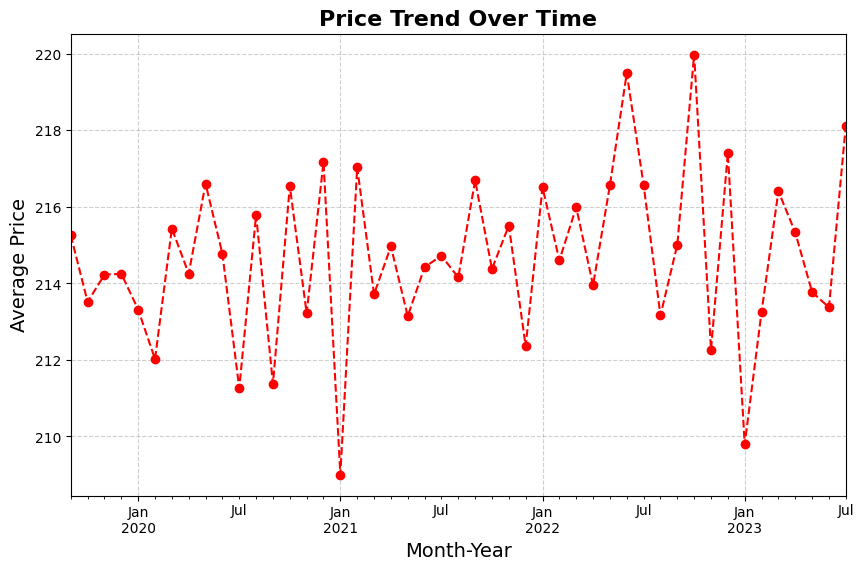

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Group by month and year to get average price
price_trend = df.groupby(df['date'].dt.to_period('M'))['price'].mean()

# Plot
plt.figure(figsize=(10, 6))
price_trend.plot(kind='line', color='red', marker='o', linestyle='--')
plt.title('Price Trend Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


<ipython-input-15-f66b2c4de389>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_per_day.values, y=avg_price_per_day.index, palette='YlGnBu')


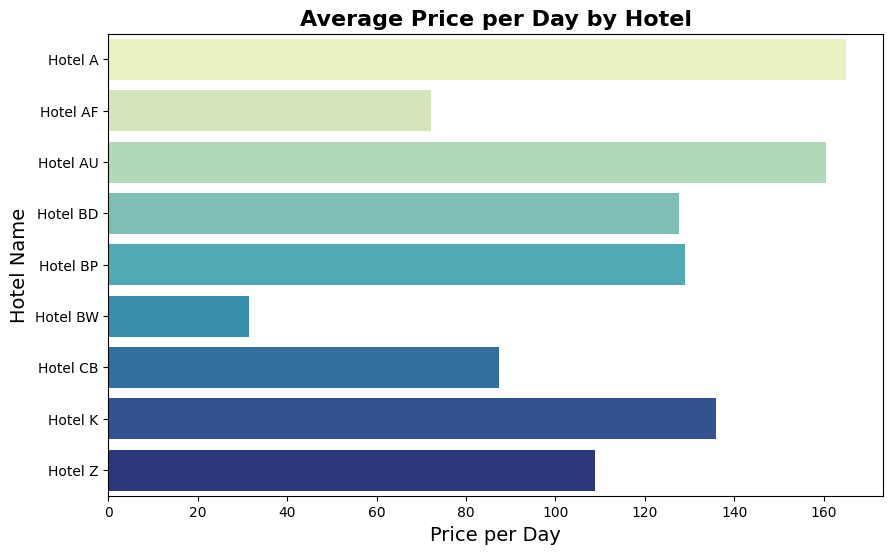

In [ ]:
# Calculate price per day for each hotel
df['price_per_day'] = df['price'] / df['days']

# Calculate average price per day by hotel
avg_price_per_day = df.groupby('name')['price_per_day'].mean()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_per_day.values, y=avg_price_per_day.index, palette='YlGnBu')
plt.title('Average Price per Day by Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Price per Day', fontsize=14)
plt.ylabel('Hotel Name', fontsize=14)
plt.show()


<ipython-input-16-aa06458f6fb5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_counts.values, y=user_counts.index, palette='Purples')


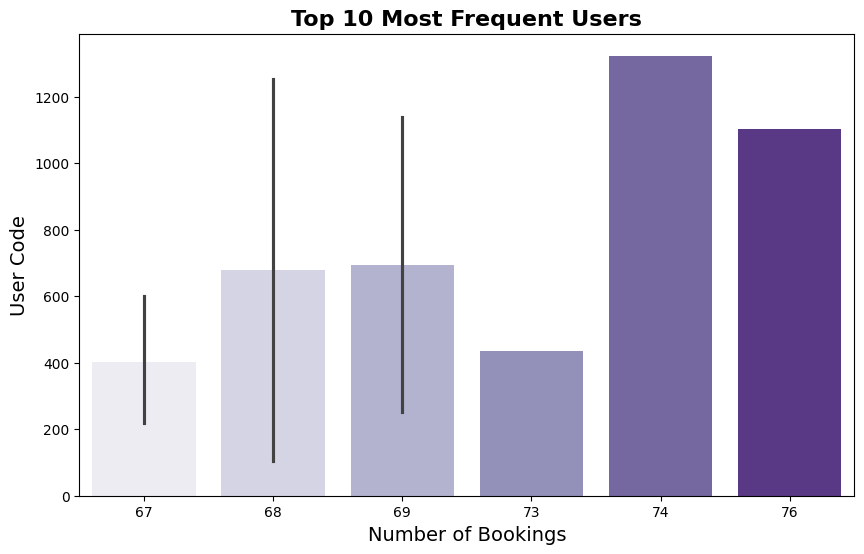

In [ ]:
# Count bookings by user
user_counts = df['userCode'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=user_counts.values, y=user_counts.index, palette='Purples')
plt.title('Top 10 Most Frequent Users', fontsize=16, fontweight='bold')
plt.xlabel('Number of Bookings', fontsize=14)
plt.ylabel('User Code', fontsize=14)
plt.show()


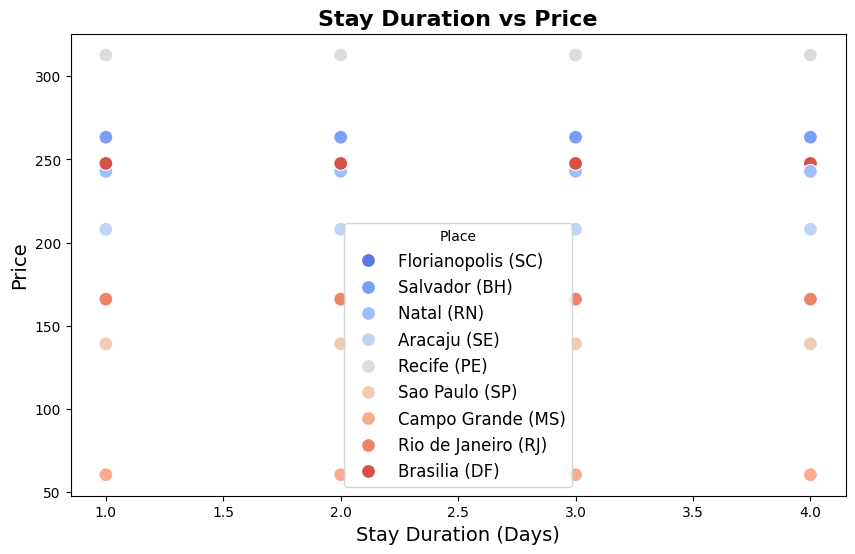

In [ ]:
# Scatter plot of Stay Duration vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='days', y='price', data=df, hue='place', palette='coolwarm', s=100)
plt.title('Stay Duration vs Price', fontsize=16, fontweight='bold')
plt.xlabel('Stay Duration (Days)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend(title='Place', fontsize=12)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target variable
X = df[['days']]  # Independent variable
y = df['price']   # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 5923.44


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Encode hotel type (Luxury = 1, Budget = 0)
df['hotel_type'] = df['name'].apply(lambda x: 1 if 'Luxury' in x else 0)

# Features and target variable
X = df[['days', 'price']]  # Independent variables
y = df['hotel_type']       # Dependent variable (hotel type)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict on test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


<ipython-input-20-6dc32895e80a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis')


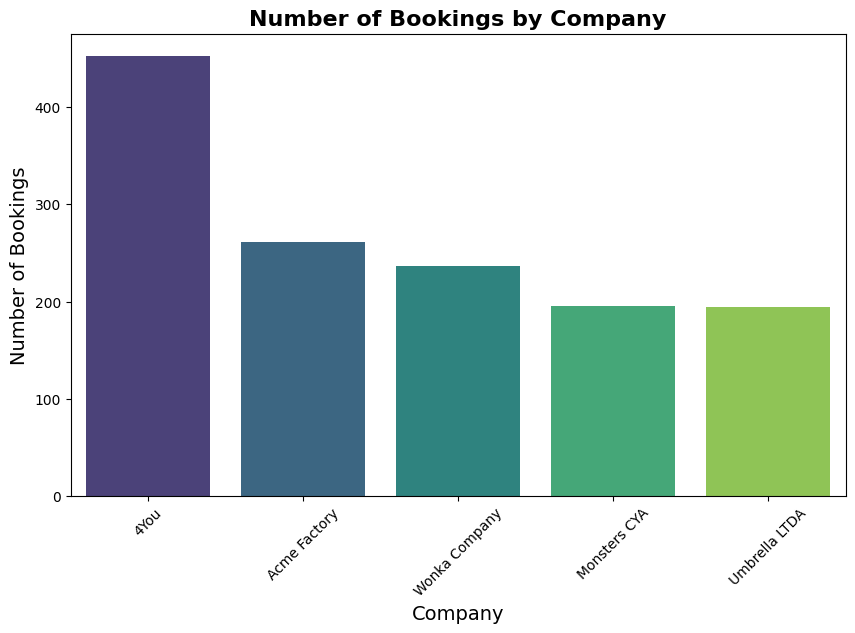

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('users.csv')

# Count the number of bookings by company
company_counts = df['company'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=company_counts.index, y=company_counts.values, palette='viridis')
plt.title('Number of Bookings by Company', fontsize=16, fontweight='bold')
plt.xlabel('Company', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-49e42e1b6ae2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')


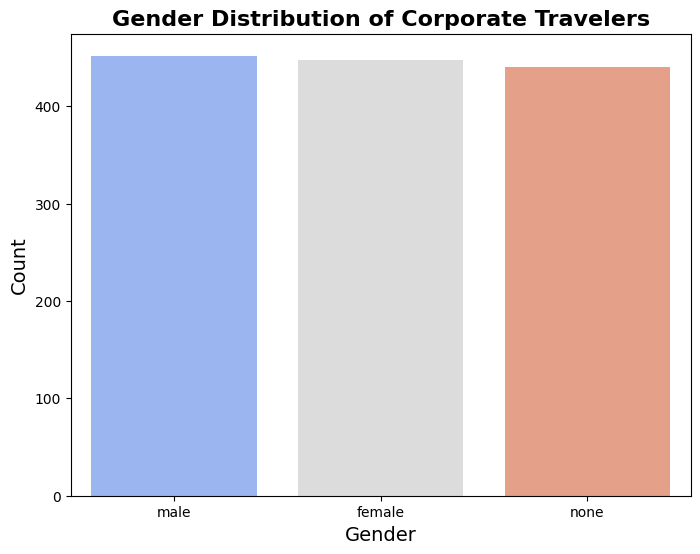

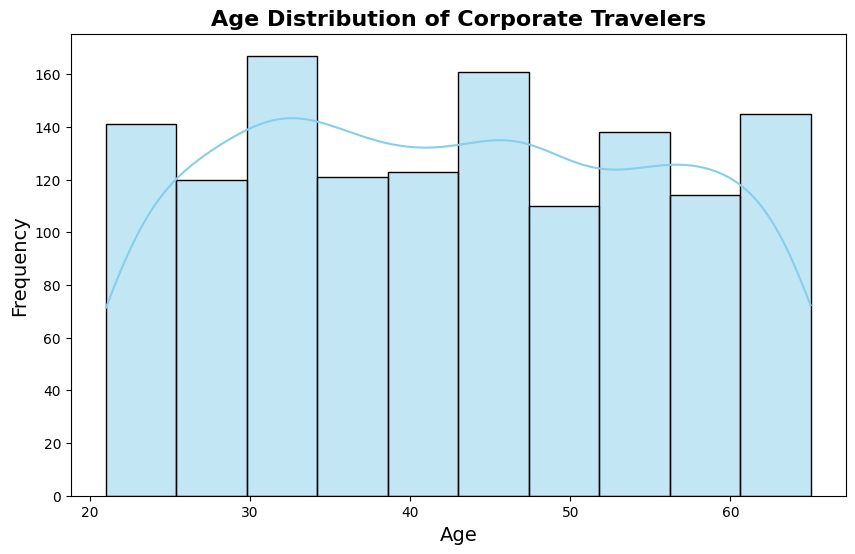

In [ ]:
# Gender distribution of customers
gender_counts = df['gender'].value_counts()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='coolwarm')
plt.title('Gender Distribution of Corporate Travelers', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='skyblue', bins=10)
plt.title('Age Distribution of Corporate Travelers', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


<ipython-input-22-7496b95eb2b3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby(pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70]))['name'].count()
<ipython-input-22-7496b95eb2b3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_groups.index.astype(str), y=age_groups.values, palette='magma')


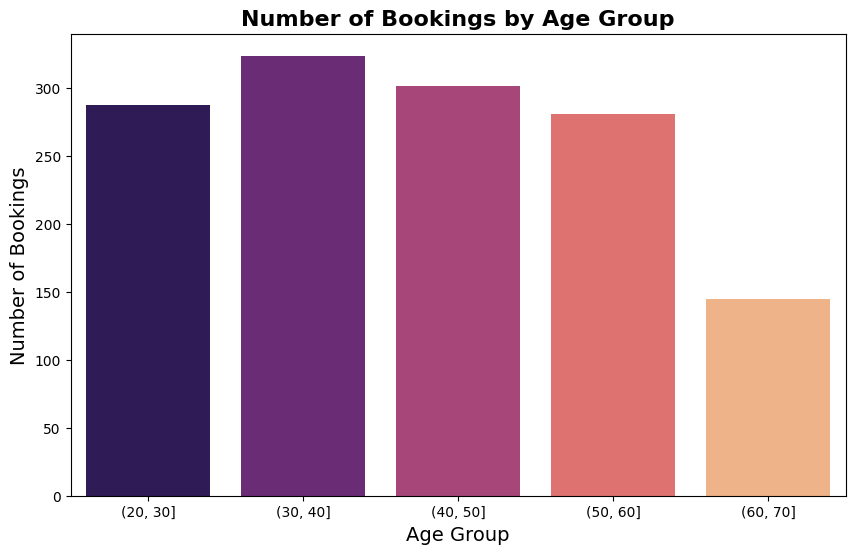

In [ ]:
# Average stay duration by age group
age_groups = df.groupby(pd.cut(df['age'], bins=[20, 30, 40, 50, 60, 70]))['name'].count()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=age_groups.index.astype(str), y=age_groups.values, palette='magma')
plt.title('Number of Bookings by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.show()

<Figure size 1000x600 with 0 Axes>

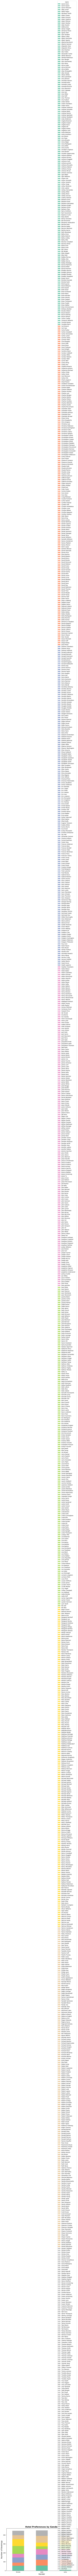

In [ ]:
# Count bookings by gender and hotel type
gender_hotel_pref = pd.crosstab(df['gender'], df['name'])

# Plot
plt.figure(figsize=(10, 6))
gender_hotel_pref.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10,6))
plt.title('Hotel Preferences by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.xticks(rotation=0)
plt.show()

KeyError: 'price'